In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read in the data
user_engagement = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')

In [5]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [9]:
# convert the 'time_stamp' column to datetime format
user_engagement['time_stamp']= pd.to_datetime(user_engagement['time_stamp'])

In [10]:
user_engagement.head(10)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [11]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [12]:
#check unique values in the visited column
user_engagement['visited'].unique()

array([1])

In [13]:
# Unique user id's
unique_ids = user_engagement['user_id'].unique()

In [14]:
# Caulculate total number of users
total_users = len(unique_ids)
print(total_users)

8823


In [15]:
#Check if the time recorded varies
user_engagement.time_stamp.dt.hour.unique()

array([ 3, 23,  8, 10, 13, 22, 16, 14, 11, 12,  6,  0, 17, 20,  2,  5,  9,
       19,  7, 21, 18,  1,  4, 15])

In [16]:
#Sort the dataframe by 'user_id' and then by 'time_stamp' and reset the index
user_engagement = user_engagement.sort_values(['user_id', 'time_stamp'], ascending=[True,True]).reset_index()


In [17]:
#look at the dataframe 
user_engagement 

,index,time_stamp,user_id,visited
0,0,2014-04-22 03:53:30,1,1
1,1,2013-11-15 03:45:04,2,1
2,2,2013-11-29 03:45:04,2,1
3,3,2013-12-09 03:45:04,2,1
4,4,2013-12-25 03:45:04,2,1
...,...,...,...,...
207912,207912,2013-09-06 06:14:15,11996,1
207913,207913,2013-01-15 18:28:37,11997,1
207914,207914,2014-04-27 12:45:16,11998,1
207915,207915,2012-06-02 11:55:59,11999,1


In [18]:
#Make a list of adopted_users
adopted_user = []

for i in range(len(user_engagement)-2):
    if  user_engagement['user_id'][i] == user_engagement['user_id'][i+2] and pd.Timedelta(user_engagement['time_stamp'][i+2] - user_engagement['time_stamp'][i]).days < 7:
        adopted_user.append(user_engagement['user_id'][i])
        
adopted_user = list(set(adopted_user))

In [19]:
print(len(adopted_user))

1602


In [20]:
listofones = [1] * len(adopted_user)

In [21]:
df_temp = pd.DataFrame({'object_id':adopted_user,
                  'adopted_user':listofones})
df_temp

,object_id,adopted_user
0,8192,1
1,2,1
2,8196,1
3,8201,1
4,10,1
...,...,...
1597,8159,1
1598,8161,1
1599,8166,1
1600,8169,1


In [22]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [23]:
users_df = pd.merge(users, df_temp, how="left", on=["object_id"])

In [24]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN


In [25]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted_user                1602 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


In [26]:
users_df['adopted_user']=users_df['adopted_user'].fillna(0)

In [27]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [28]:
#Ratio of classes
users_df['adopted_user'].value_counts(normalize = True)

0.0    0.8665
1.0    0.1335
Name: adopted_user, dtype: float64

In [29]:
# change values in users_df['invited_by_user_id'] to indicate whether they were invited or not, '1' = inveted, '0'=not invited
condlist = [users_df['invited_by_user_id'] >= 1, users_df['invited_by_user_id'] <= 0] 
choice = [1, 0] 
users_df['invited_by_user_id'].loc[:] = np.select(condlist, choice)

In [30]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,1.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,1.0,0.0


In [31]:
# One-hot encode 'creation_source'
y = pd.get_dummies(users_df.creation_source, prefix='source')
print(y.head())

   source_GUEST_INVITE  source_ORG_INVITE  source_PERSONAL_PROJECTS  \
0                    1                  0                         0   
1                    0                  1                         0   
2                    0                  1                         0   
3                    1                  0                         0   
4                    1                  0                         0   

   source_SIGNUP  source_SIGNUP_GOOGLE_AUTH  
0              0                          0  
1              0                          0  
2              0                          0  
3              0                          0  
4              0                          0  


In [32]:
#merge datafames
users_df = users_df.join(y)

In [33]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,1.0,0.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1.0,1.0,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1.0,0.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,1.0,0.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,1.0,0.0,1,0,0,0,0


In [34]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,1.0,0.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1.0,1.0,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1.0,0.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,1.0,0.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,1.0,0.0,1,0,0,0,0


In [35]:
# convert the 'creation_time' column to datetime format
users_df['creation_time']= pd.to_datetime(users_df['creation_time'])

In [36]:
users_df['creation_time'] = (users_df['creation_time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [37]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  int64  
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
 10  adopted_user                12000 non-null  float64
 11  source_GUEST_INVITE         12000 non-null  uint8  
 12  source_ORG_INVITE           12000 non-null  uint8  
 13  source_PERSONAL_PROJECTS    120

In [38]:
# Time from account creation to last login
users_df['time_lapse'] = users_df['last_session_creation_time']- users_df['creation_time'] 

In [39]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  int64  
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
 10  adopted_user                12000 non-null  float64
 11  source_GUEST_INVITE         12000 non-null  uint8  
 12  source_ORG_INVITE           12000 non-null  uint8  
 13  source_PERSONAL_PROJECTS    120

In [40]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH,time_lapse
0,1,1398138810,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,1.0,0.0,1,0,0,0,0,0.0
1,2,1384487104,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1.0,1.0,0,1,0,0,0,11750400.0
2,3,1363734892,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1.0,0.0,0,1,0,0,0,0.0
3,4,1369123768,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,1.0,0.0,1,0,0,0,0,86400.0
4,5,1358417660,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,1.0,0.0,1,0,0,0,0,432000.0


In [41]:
users_df['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

# Modeling

In [42]:
# Import Extreme Gradient Boosting Classification Model 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [43]:
# Create axes for labels and features
y = users_df['adopted_user']
X = users_df.drop(['object_id','name','email','creation_source','org_id', 'adopted_user', 
                   'last_session_creation_time','creation_time'], axis=1)

# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
#Since the we have a class imbalance, we have to account for that using 'scale_pos_weight'
#define classifier
xgbc = XGBClassifier(random_state= 42)
#define parameters
grid_params = {
    'scale_pos_weight':[5, 6, 7],
    'n_estimators': [500],
    'max_depth': [3,4,5],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid_cv = GridSearchCV(estimator=xgbc, scoring='roc_auc', param_grid=grid_params, cv=3, n_jobs=-1, verbose=1)
#execute search
xgb_result = xgb_grid_cv.fit(X_train, y_train)

# summarize result
print(f"Best Score: {xgb_result.best_score_}")
print(f"Best Hyperparameters: {xgb_result.best_params_}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   34.9s finished


Best Score: 0.9939067731306798
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'scale_pos_weight': 6}


In [45]:
bst_model = xgb_result.best_estimator_

In [46]:
y_predx = bst_model.predict(X_test)

In [47]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_probx = bst_model.predict_proba(X_test)[:, 1]

In [48]:
print(classification_report(y_test, y_predx))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      3114
         1.0       0.74      0.97      0.84       486

    accuracy                           0.95      3600
   macro avg       0.87      0.96      0.91      3600
weighted avg       0.96      0.95      0.95      3600



In [49]:
# ROC- AUC score
print(f'ROC-AUC score: {roc_auc_score(y_test,y_pred_probx):.4f}')
#Accuracy score
print(f'Accuracy score: {accuracy_score(y_test,y_predx):.4f}')

ROC-AUC score: 0.9944
Accuracy score: 0.9508


In [50]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
from matplotlib import pyplot

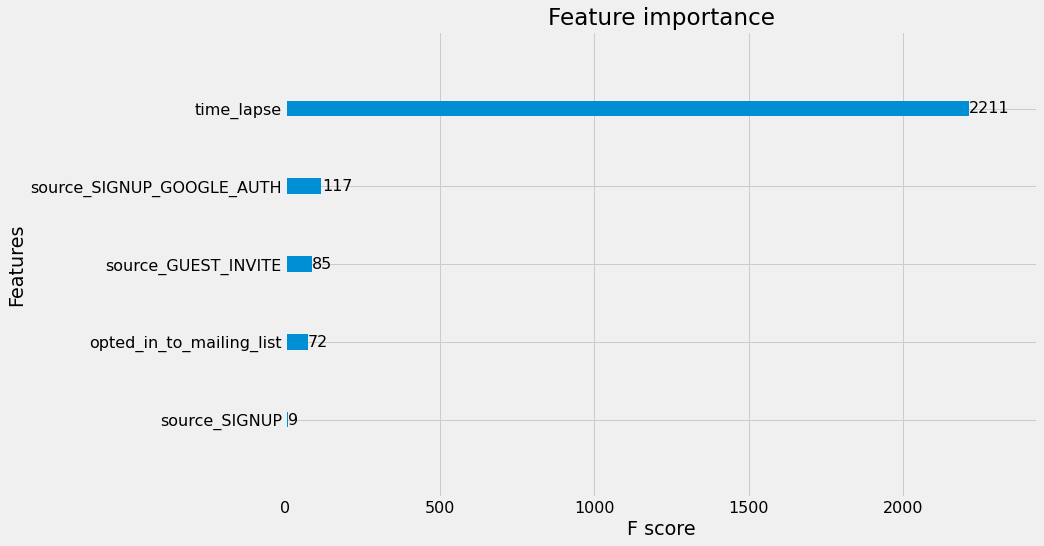

In [51]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

plt.rcParams["figure.figsize"] = (12,8) 
plot_importance(bst_model)
plt.show();